In [399]:
#Autores:
#Elián Roventini Andrade
#Gabriel Souza Recouso
#Vinícius Luiz Ventura Ribeiro

#Abaixo está definido TODAS as bibliotecas utilizadas neste trabalho
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import scipy.stats
from matplotlib.ticker import PercentFormatter
from statistics import stdev

# Definindo funções do programa

In [400]:
#Defininido função para descobrir a mediana e a posição que ela se encontra
def mediana(a):

  a.sort() #Ordenando a coluna
  pos = 0.5*(a.size+1)

  if (pos == int(pos)):
    return [pos, a[int(pos)]]
  else:
    return [pos, 0.5*(a[int(pos)]+a[int(pos)+1])]

In [401]:
#Definindo função para pegarmos o mínimo e máximo para o box-plot
def MinMax(a, b):

  aMin = int(a)
  while aMin % 10:
    aMin -= 1

  bMax = int(b)
  while bMax % 10:
    bMax += 1

  return [aMin, bMax+10]

---------------------------------------------------

# Importação do arquivo

In [402]:
#Importando o arquivo com os dados e mostrando as 10 primeiras linhas
df = pd.read_csv('/content/Train.csv')
df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


---------------------------------------------------

# 2. Elabore a tabela de frequências com os dados deste arquivo,
  1. Caso os dados sejam categóricos, a tabela deve conter as categorias, a frequência, a frequência acumulada, as respectivas frequências relativas e o diagrama de Pareto das variáveis

# Tipo Categórico

In [403]:
#Definindo a tabela de frequência, primeiramente pegando a coluna chamada 'Mode_of_Shipment', efetuando a contagem de cada valor nessa coluna e convertendo em um DataFrame, descobrindo assim a frequência de cada item
#Após isso, estamos resetando o index do dataframe apenas por conveniência e assim mostrando a tabela
tabela = df['Mode_of_Shipment'].value_counts().to_frame()
tabela = tabela.reset_index()
tabela

,index,Mode_of_Shipment
0,Ship,7462
1,Flight,1777
2,Road,1760


In [404]:
#Aqui estamos alterando o nome das colunas para uma visibilidade melhor
tabela.rename(columns={'Mode_of_Shipment':'freq', 'index':'tipo_locomocao'}, inplace=True)
tabela

,tipo_locomocao,freq
0,Ship,7462
1,Flight,1777
2,Road,1760


In [405]:
#Para descobrir a Frequência Acumulada, somamos todas as frequências de cada linha
tabela['freqAcum'] = tabela['freq'].cumsum()
tabela

,tipo_locomocao,freq,freqAcum
0,Ship,7462,7462
1,Flight,1777,9239
2,Road,1760,10999


In [406]:
#Estamos efetuando a soma da coluna de frequência e dividindo pela frequência de cada linha para descobrirmos a Frequência Relativa
tabela['freqRel'] = tabela['freq']/tabela['freq'].sum()
tabela

,tipo_locomocao,freq,freqAcum,freqRel
0,Ship,7462,7462,0.678425
1,Flight,1777,9239,0.161560
2,Road,1760,10999,0.160015


In [407]:
#Utilizamos o mesmo processo anteriormente para descobrir a frequência relativa acumulada, no entanto dividimos pela frequência acumulada
tabela['freqRelAcum'] = tabela['freqAcum']/tabela['freq'].sum()
tabela

,tipo_locomocao,freq,freqAcum,freqRel,freqRelAcum
0,Ship,7462,7462,0.678425,0.678425
1,Flight,1777,9239,0.161560,0.839985
2,Road,1760,10999,0.160015,1.000000


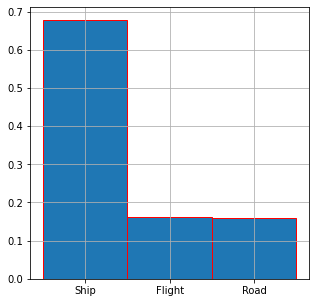

In [408]:
#Aqui geramos um gráfico para podermos ver as diferenças e o tipo de locomação que é mais utilizado para o transporte dos produtos dessa base de dados
nomes = tabela['tipo_locomocao'].to_list()
valores = tabela['freqRel'].to_list()

plt.figure(figsize=(5,5))
plt.bar(nomes, valores, width=1, edgecolor='red')
plt.grid()
plt.show()

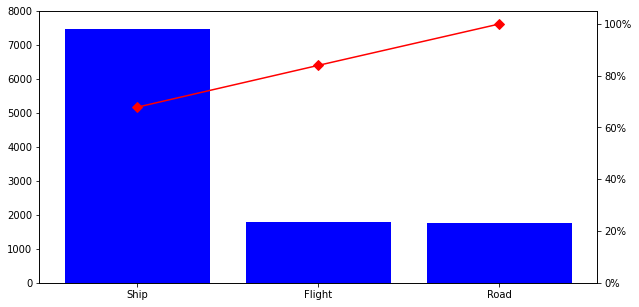

In [409]:
#Neste bloco de Código estamos realizando o Diagrama de Pareto
tabela_pareto = tabela
tabela_pareto = tabela_pareto.sort_values(by='freq',ascending=False) #Ordenando os valores da tabela de frequência, do maior para o menor
tabela_pareto["freqRelAcum"] = round(tabela_pareto["freq"].cumsum()/tabela_pareto["freq"].sum()*100,2) #atribuindo a Frequencia Relativa Acumulada, arrendodamos a soma acumulada da frequência dividido pela soma total da frequência multiplicada por 100.
fig, ax = plt.subplots(figsize=(10,5)) #Definindo tamanho do gráfico
ax.bar(tabela_pareto.tipo_locomocao, tabela_pareto["freq"], color="blue") #Criando as barras do gráfico colorindo de azul
ax2 = ax.twinx()
ax2.plot(tabela_pareto.tipo_locomocao, tabela_pareto["freqRelAcum"], color="red", marker="D", ms=7) #Definindo a linha do diagrama de pareto
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="black") #Definindo valores de y com cor preto
ax2.tick_params(axis="y", colors="black") #Definindo valores de y com cor preto
ax2.set_ylim(0,105) #Melhorando a visibilidade do gráfico
ax.set_ylim(0,8000) #Melhorando a visibilidade do gráfico
plt.show()

---------------------------------------------------

# 2. Elabore a tabela de frequências com os dados deste arquivo,
2. Caso os dados sejam numéricos, a tabela deve conter as faixas de valores, o ponto médio, a
frequência, a frequência acumulada, as respectivas frequências relativas e a ogiva das variáveis

#Tipo Numérico

In [410]:
N = df['Customer_rating'].count()  # quantidade de amostras
Max = df['Customer_rating'].max()  # maior valor entre as amostras
Min = df['Customer_rating'].min()  # menor valor entre as amostras
print('N = '+str(N)+'\nMax = '+str(Max)+'\nMin = '+str(Min))

N = 10999
Max = 5
Min = 1


In [411]:
n = m.ceil(m.log2(N))       # quantidade de faixas de valores (linhas na tabela) => fórmula de Sturges
A = Max - Min               # amplitude total das amostras
c = 1                       # quantidade de casas decimais das amostras
d = 0.1*c*m.ceil(10*c*A/n)  # amplitude das faixas de valores
print('n = '+str(n)+'\nA = '+str(A)+'\nd = '+str(d))

n = 14
A = 4
d = 0.30000000000000004


In [412]:
faixa = np.arange(Min, Min+n*d, d) #Criando a faixa
faixa

array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. , 4.3, 4.6,
       4.9, 5.2])

In [413]:
tabela2 = pd.DataFrame(faixa, columns=['limite inferior']) #Definindo coluna de limite inferior
tabela2

,limite inferior
0,1.0
1,1.3
2,1.6
3,1.9
4,2.2
5,2.5
6,2.8
7,3.1
8,3.4
9,3.7


In [414]:
tabela2['limite superior'] = tabela2['limite inferior']+d #Definindo coluna de limite superior
tabela2['ponto medio'] = tabela2['limite inferior']+round(d*0.5,1) #Definindo coluna de ponto médio
tabela2

,limite inferior,limite superior,ponto medio
0,1.0,1.3,1.2
1,1.3,1.6,1.5
2,1.6,1.9,1.8
3,1.9,2.2,2.1
4,2.2,2.5,2.4
5,2.5,2.8,2.7
6,2.8,3.1,3.0
7,3.1,3.4,3.3
8,3.4,3.7,3.6
9,3.7,4.0,3.9


In [415]:
#Definindo coluna de frequência a partir do limite inferior
freq = np.empty(0)
for limite in tabela2['limite inferior']:
  freq = np.append(freq, df[(df['Customer_rating']>=limite) & (df['Customer_rating']<limite+d)]['Customer_rating'].count())
tabela2['freq'] = freq
tabela2

,limite inferior,limite superior,ponto medio,freq
0,1.0,1.3,1.2,2235.0
1,1.3,1.6,1.5,0.0
2,1.6,1.9,1.8,0.0
3,1.9,2.2,2.1,2165.0
4,2.2,2.5,2.4,0.0
5,2.5,2.8,2.7,0.0
6,2.8,3.1,3.0,2239.0
7,3.1,3.4,3.3,0.0
8,3.4,3.7,3.6,0.0
9,3.7,4.0,3.9,0.0


In [416]:
#Definindo coluna de frequência relativa, realizando a divisão entre a frequência e a soma acumulada da frequências para cada linha
tabela2['freqRel'] = tabela2['freq']/tabela2['freq'].sum()
tabela2

,limite inferior,limite superior,ponto medio,freq,freqRel
0,1.0,1.3,1.2,2235.0,0.203200
1,1.3,1.6,1.5,0.0,0.000000
2,1.6,1.9,1.8,0.0,0.000000
3,1.9,2.2,2.1,2165.0,0.196836
4,2.2,2.5,2.4,0.0,0.000000
5,2.5,2.8,2.7,0.0,0.000000
6,2.8,3.1,3.0,2239.0,0.203564
7,3.1,3.4,3.3,0.0,0.000000
8,3.4,3.7,3.6,0.0,0.000000
9,3.7,4.0,3.9,0.0,0.000000


In [417]:
#Definindo frequência acumulada
tabela2['freqAcum'] = tabela2['freq'].cumsum()
tabela2

,limite inferior,limite superior,ponto medio,freq,freqRel,freqAcum
0,1.0,1.3,1.2,2235.0,0.203200,2235.0
1,1.3,1.6,1.5,0.0,0.000000,2235.0
2,1.6,1.9,1.8,0.0,0.000000,2235.0
3,1.9,2.2,2.1,2165.0,0.196836,4400.0
4,2.2,2.5,2.4,0.0,0.000000,4400.0
5,2.5,2.8,2.7,0.0,0.000000,4400.0
6,2.8,3.1,3.0,2239.0,0.203564,6639.0
7,3.1,3.4,3.3,0.0,0.000000,6639.0
8,3.4,3.7,3.6,0.0,0.000000,6639.0
9,3.7,4.0,3.9,0.0,0.000000,6639.0


In [418]:
#Divisão entre frequência acumulada e a soma das frequências para gerar a frequência relativa acumulada
tabela2['freqRelAcum'] = tabela2['freqAcum']/tabela2['freq'].sum()
tabela2

,limite inferior,limite superior,ponto medio,freq,freqRel,freqAcum,freqRelAcum
0,1.0,1.3,1.2,2235.0,0.203200,2235.0,0.203200
1,1.3,1.6,1.5,0.0,0.000000,2235.0,0.203200
2,1.6,1.9,1.8,0.0,0.000000,2235.0,0.203200
3,1.9,2.2,2.1,2165.0,0.196836,4400.0,0.400036
4,2.2,2.5,2.4,0.0,0.000000,4400.0,0.400036
5,2.5,2.8,2.7,0.0,0.000000,4400.0,0.400036
6,2.8,3.1,3.0,2239.0,0.203564,6639.0,0.603600
7,3.1,3.4,3.3,0.0,0.000000,6639.0,0.603600
8,3.4,3.7,3.6,0.0,0.000000,6639.0,0.603600
9,3.7,4.0,3.9,0.0,0.000000,6639.0,0.603600


In [419]:
#Definindo os pontos médios para gerar o gráfico
pontoMedio = np.array(tabela2['ponto medio'])
pontoMedio = np.insert(pontoMedio, [0, n], [Min-d*0.5, Min+d*(n+0.5)])

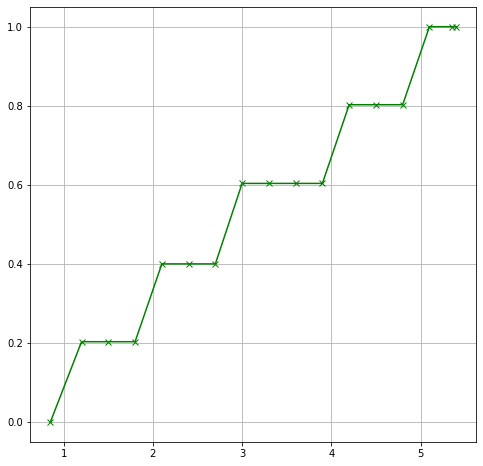

In [420]:
#Gerando o gráfico: Ogiva das variáveis
freqAcumulada = np.array(tabela2['freqRelAcum'])
freqAcumulada = np.insert(freqAcumulada, [0, n], [0., 1.])

plt.figure(figsize=(8,8))
plt.plot(pontoMedio, freqAcumulada, color='green', marker='x')
plt.grid()

# 3. Estime a moda, mediana e quartis, média e o desvio padrão dos dados usando tanto os valores disponíveis no arquivo, quanto os valores da tabela de frequências

# Valor disponível no arquivo: Coluna dos Custos dos produtos

In [421]:
#Atribuindo na variável valor_produtos a coluna 'Cost_of_the_Product' e transformando ela em um numpy array
valor_produtos = np.array(df['Cost_of_the_Product'])
valor_produtos

array([177, 216, 183, ..., 242, 223, 155])

In [422]:
#Valor da moda
x = stats.mode(valor_produtos)
print('Moda:', x[0][0])

Moda: 245


In [423]:
#Aqui descobrimos a posição da mediana e o valor da mediana
[posMed, med] = mediana(valor_produtos)
print(f'posição da mediana = {posMed}\tvalor da mediana = {med}')

posição da mediana = 5500.0	valor da mediana = 214


In [424]:
#Transformando todos os valores do vetor em inteiro, caso tenha algum valor float
valor_produtos[:int(posMed)]

array([ 96,  96,  96, ..., 214, 214, 214])

In [425]:
#Descobrindo a posição do 1º quartil e o valor do 1º quartil
[posQ1, q1] = mediana(valor_produtos[:int(posMed)])
print(f'posição do 1º quartil = {posQ1}\tvalor do 1º quartil = {q1}')

posição do 1º quartil = 2750.5	valor do 1º quartil = 169.5


In [426]:
#Descobrindo a posição do 3º quartil e o valor do 3º quartil
[posQ3, q3] = mediana(valor_produtos[int(posMed):])
print(f'posição do 3º quartil = {posQ3}\tvalor do 3º quartil = {q3}')

posição do 3º quartil = 2750.0	valor do 3º quartil = 251


In [427]:
#Descobrindo o intervalo interquartil, valor mínimo e o valor máximo
iQ = q3 - q1 #Intervalo Interquartil é igual a subtração do 3º quartil e o 1º quartil
vMin = q1 - 1.5*iQ #O Valor mínimo próvem da subtração entre o 1º quartil com a multiplicação entre o Intervalo Interquartil e 1.5
vMax = q3 + 1.5*iQ #O Valor máximo próvem da soma entre o 3º quartil com a multiplicação entre o Intervalo Interquartil e 1.5

print(f'intervalo interquartil = {iQ}\tvalor mínimo = {vMin}\tvalor máximo = {vMax}')

intervalo interquartil = 81.5	valor mínimo = 47.25	valor máximo = 373.25


In [428]:
#Descobrindo a média utilizando a biblioteca median do numpy
media = np.median(valor_produtos)
print('media:',media)

media: 214.0


In [429]:
#Desvio Padrão dos Dados utilizando a biblioteca de estatística
y = stdev(valor_produtos)
print('Desvio padrao de dados: {:.3f}'.format(y))

Desvio padrao de dados: 48.062


---------------------------------------------------

# Valor da tabela de frequência númerica ('freq')

In [430]:
#Atribuindo na variável a coluna da frequência de valor numérico e transformando ela em um numpy array
frequencia_tabela2 = np.array(tabela2['freq'])
frequencia_tabela2

array([2235.,    0.,    0., 2165.,    0.,    0., 2239.,    0.,    0.,
          0., 2189.,    0.,    0., 2171.,    0.])

In [431]:
#Valor da moda
moda2 = stats.mode(frequencia_tabela2)
print('Moda:', moda2[0][0])

Moda: 0.0


In [432]:
#Aqui descobrimos a posição da mediana e o valor da mediana
[posMed_tabela2, med_tabela2] = mediana(frequencia_tabela2)
print(f'posição da mediana = {posMed_tabela2}\tvalor da mediana = {med_tabela2}')

posição da mediana = 8.0	valor da mediana = 0.0


In [433]:
#Transformando todos os valores do vetor em inteiro, caso tenha algum valor float
frequencia_tabela2[:int(posMed_tabela2)]

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [434]:
#Descobrindo a posição do 1º quartil e o valor do 1º quartil
[posQ1_tabela2, q1_tabela2] = mediana(frequencia_tabela2[:int(posMed_tabela2)])
print(f'posição do 1º quartil = {posQ1_tabela2}\tvalor do 1º quartil = {q1_tabela2}')

posição do 1º quartil = 4.5	valor do 1º quartil = 0.0


In [435]:
#Descobrindo a posição do 3º quartil e o valor do 3º quartil
[posQ3_tabela2, q3_tabela2] = mediana(frequencia_tabela2[int(posMed_tabela2):])
print(f'posição do 3º quartil = {posQ3_tabela2}\tvalor do 3º quartil = {q3_tabela2}')

posição do 3º quartil = 4.0	valor do 3º quartil = 2189.0


In [436]:
#Descobrindo o intervalo interquartil, valor mínimo e o valor máximo
iQ_tabela2 = q3_tabela2 - q1_tabela2 #Intervalo Interquartil é igual a subtração do 3º quartil e o 1º quartil
vMin_tabela2 = q1_tabela2 - 1.5*iQ_tabela2 #O Valor mínimo próvem da subtração entre o 1º quartil com a multiplicação entre o Intervalo Interquartil e 1.5
vMax_tabela2 = q3_tabela2 + 1.5*iQ_tabela2 #O Valor máximo próvem da soma entre o 3º quartil com a multiplicação entre o Intervalo Interquartil e 1.5

print(f'intervalo interquartil = {iQ_tabela2}\tvalor mínimo = {vMin_tabela2}\tvalor máximo = {vMax_tabela2}')

intervalo interquartil = 2189.0	valor mínimo = -3283.5	valor máximo = 5472.5


In [437]:
#Fazendo a media
media_tabela2 = 0
for x in frequencia_tabela2:
  media_tabela2 += x

media_tabela2 /= len(frequencia_tabela2)
print('media: {:.3f}'.format(media_tabela2))

media: 733.267


In [438]:
#Desvio Padrão dos Dados utilizando a biblioteca de estatística
y_tabela2 = stdev(frequencia_tabela2)
print('Desvio padrao de dados: {:.3f}'.format(y_tabela2))

Desvio padrao de dados: 1073.557


---------------------------------------------------

# 4. No caso dos dados numéricos, estime a probabilidade de ocorrências entre dois valores quaisquer através da tabela de frequências

In [439]:
#Probabiliade entre os valores de index 0 e 3
probabilidadeEntre2Valores = (tabela2['freqAcum'][0] + (((tabela2['freqAcum'][3] - tabela2['freqAcum'][0]) * (4 - tabela2['ponto medio'][0])) / (tabela2['ponto medio'][3] - tabela2['ponto medio'][0]))) / tabela2['freqAcum'][14]
Percentual = 1 - probabilidadeEntre2Valores
Percentual *= 100 
print('Total de pessoas que deram a nota 4, dentro deste periodo: {:.1f}%'.format(Percentual))

Total de pessoas que deram a nota 4, dentro deste periodo: 18.4%


---------------------------------------------------


# 5. Estime e mostre os valores para o box-plot indicando os outliers, caso existam, anto os valores disponíveis no arquivo, quanto os valores da tabela de frequências.

# Box-Plot para Valor disponível no arquivo (Custos dos produtos)

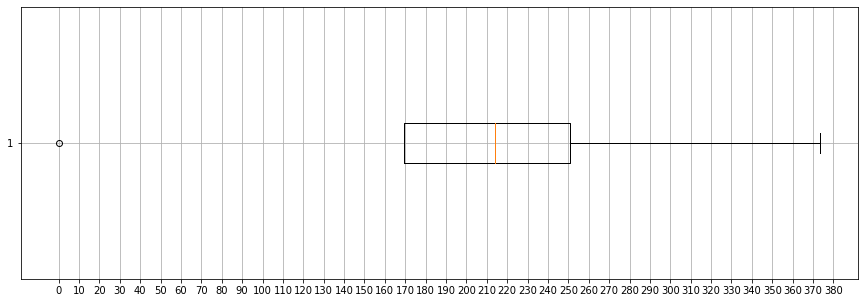

In [440]:
#BoxPlot para Valores dos produtos


boxPlotV1 = np.array([round(vMin,1), q1, med, q3, round(vMax,1)]) #transformando em array numpy os valores: o valor mínimo da tabela, 1 quartil, mediana, 3 quartil e valor máximo da tabela
boxPlotV1[0] = 0 #Inicializando o vetor de index 0 como 0

[xMin, xMax] = MinMax(boxPlotV1[0], boxPlotV1[4]) #Atribuindo dentro das variaveis de um array o mínimo e máximo para o box-plot
plt.subplots(figsize=(15,5)) #Atribuindo tamanho da figura
plt.boxplot(boxPlotV1, vert=False)
plt.xticks(range(xMin, xMax, 10)) #O ponto que queremos descobrir para o box-plot
plt.grid()
plt.show()

---------------------------------------------------

# Box-Plot para Tabela de Frequência tipo numérica

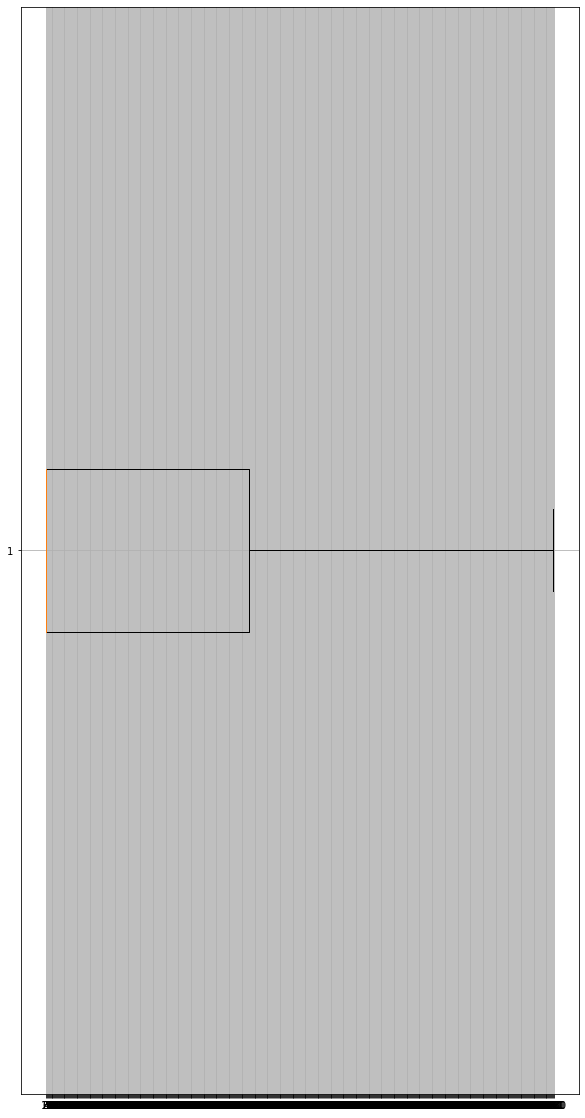

In [441]:
#BoxPlot para Tabela de Frequência


boxPlotV2 = np.array([round(vMin_tabela2,1), q1_tabela2, med_tabela2, q3_tabela2, round(vMax_tabela2,1)]) #transformando em array numpy os valores: o valor mínimo da tabela, 1 quartil, mediana, 3 quartil e valor máximo da tabela
boxPlotV2[0] = 0 #Inicializando o vetor de index 0 como 0

[xMin_tabela2, xMax_tabela2] = MinMax(boxPlotV2[0], boxPlotV2[4]) #Atribuindo dentro das variaveis de um array o mínimo e máximo para o box-plot
plt.subplots(figsize=(10,20)) #Atribuindo tamanho da figura
plt.boxplot(boxPlotV2, vert=False)
plt.xticks(range(xMin_tabela2, xMax_tabela2, 10)) #O ponto que queremos descobrir para o box-plot
plt.grid()
plt.show()